# Observasi

In [1]:
import json
import pymongo
from pymongo import MongoClient

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

### test ui
http://178.128.103.236:3000/product

# Pipeline

## category

In [3]:
with open('category.json', 'r') as out:
    data = json.load(out)
    data = data[0]

In [4]:
datas = data['data']['categoryAllListLite']['categories']

In [5]:
def find_categ_name(id):
    for data in datas:
        if str(id) == str(data['id']):
            return data['name']
    return None

In [6]:
def categ_to_name(datas):
    for data in datas:
        name = find_categ_name(data['_id'])
        data['_id'] = name
        
    return datas

# Connecting Mongo

In [7]:
client = MongoClient('localhost:9700')
db = client.tokpedstat

# common function

In [8]:
def grafik(df, dimensi=[13, 9], name=None):
    fig_dims = dimensi
    fig, ax = plt.subplots(figsize=fig_dims)

    g = sns.barplot(data = df, x='_id', y='total', ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=40)
    
    if name:
        fig.savefig('img/{}.png'.format(name))
        
    plt.show(g)

In [9]:
db.product.count()

f:\python3\environment\test\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


3111315

# Stat By Category

In [10]:
aggr = [
    {
        "$group": {
            "_id": "$cat_id_1",
            "total": { "$sum": 1 }
        }
    }
]

hasil = db.product.aggregate(aggr)
hasil = list(hasil)
hasil = categ_to_name(hasil)
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

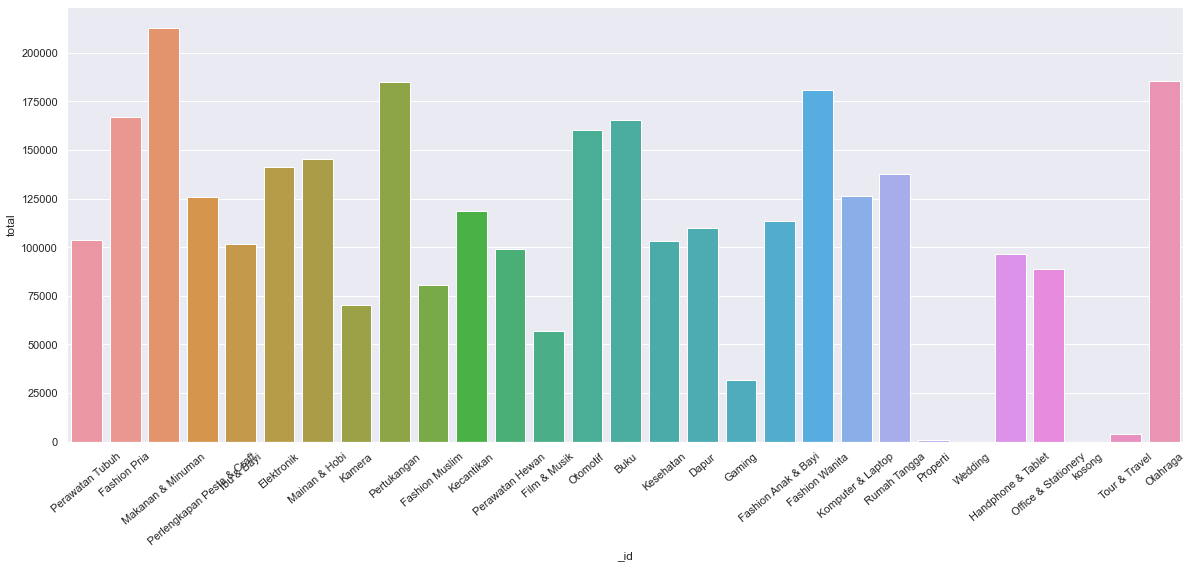

In [11]:
grafik(df, (20,8), 'kategori')

# Timeline created data

In [12]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { '_id': 1 } },
]

hasilc = db.product.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

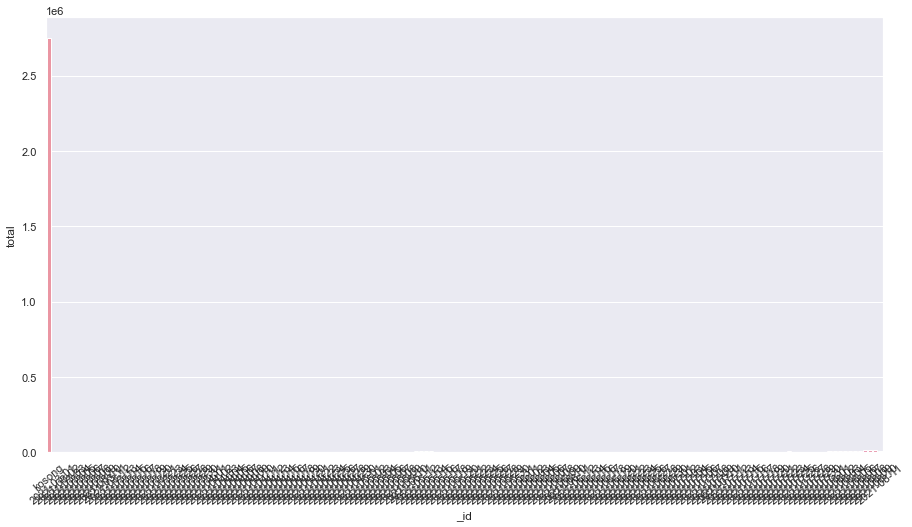

In [13]:
grafik(df, (15,8), 'created')

## Without null Value

In [14]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)
df.describe()

,total
count,1.640000e+02
mean,1.897179e+04
std,2.145117e+05
min,3.700000e+02
25%,9.355000e+02
50%,1.337000e+03
75%,2.461500e+03
max,2.749127e+06


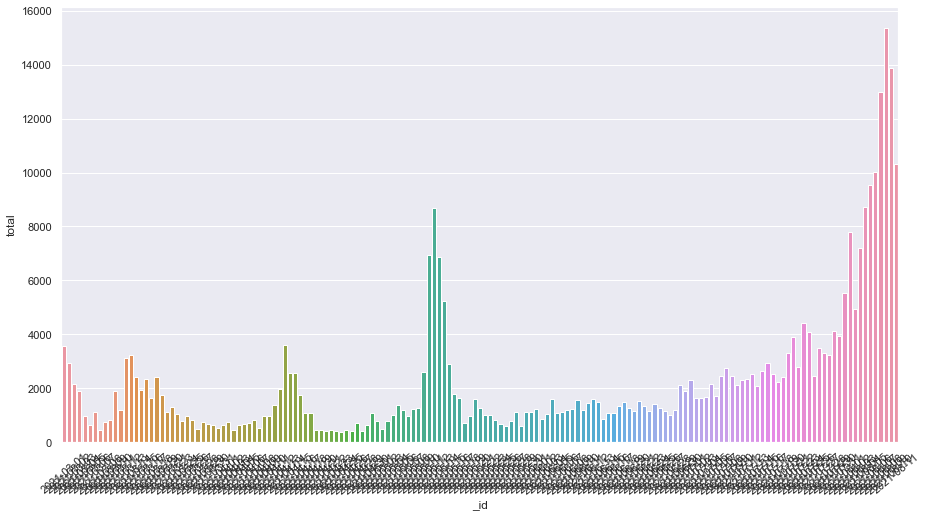

In [15]:
grafik(df, (15,8), 'created_not_null')

# Checking Last up Data

In [16]:
aggr = [ 
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$last_updated" } },
            "total": { "$sum": 1 }
        }
    }
]

hasillast = db.product.aggregate(aggr)
hasillast = list(hasillast)
df = pd.DataFrame.from_records(hasillast)
df = df.fillna(value='kosong')
df.describe()

,total
count,2.400000e+01
mean,1.296406e+05
std,2.843112e+05
min,1.000000e+00
25%,1.000000e+00
50%,3.744400e+04
75%,1.259740e+05
max,1.397974e+06


In [17]:
# hasillast = [
#     {
#         '_id': '2021-03-19',
#         'total': 296237
#     },
    
#     {
#         '_id': '2021-03-20',
#         'total': 396237
#     },
    
#     {
#         '_id': '2021-03-21',
#         'total': 1381186
#     },
    
# ]
# df = pd.DataFrame.from_records(hasillast)
# grafik(df, (15,8), 'last_updated')

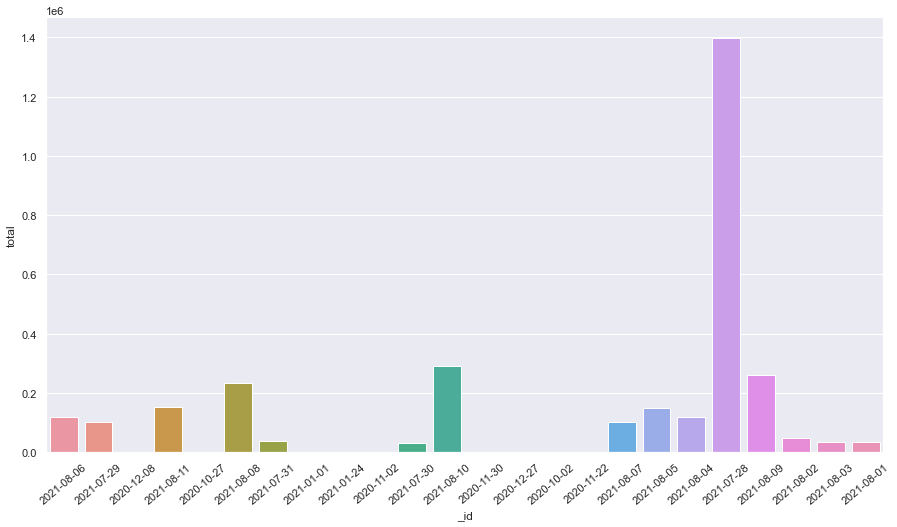

In [18]:
grafik(df, (15,8), 'last_updated')

# Statistik Toko

In [19]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { '_id': 1 } }
]

hasilc = db.toko.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

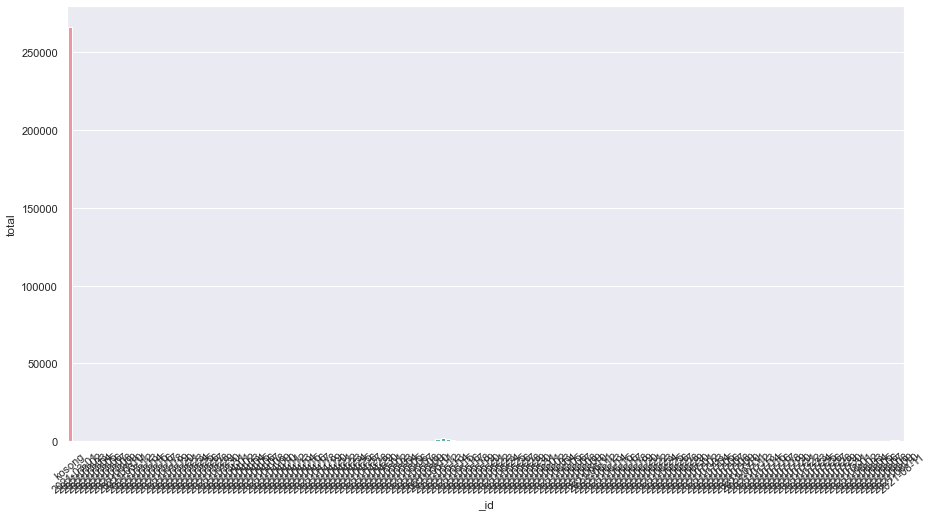

In [20]:
grafik(df, (15,8), 'shop_created')

In [21]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)

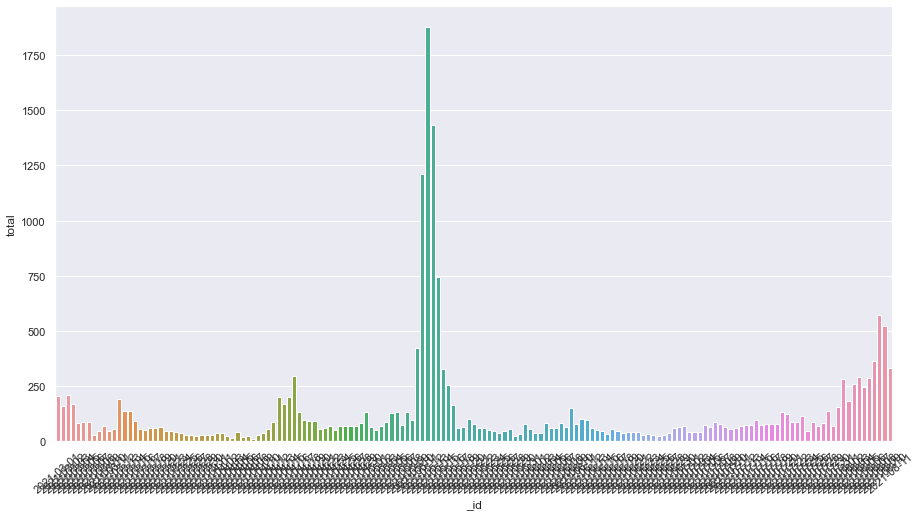

In [22]:
grafik(df, (15,8), 'shop_created_notnull')

In [23]:
aggr = [
    { "$match": { "rating": { "$gte": 5 } }},
    {
        "$group": {
            "_id": "$location",
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { "total": -1 } },
    { "$limit": 20 }
]

hasil = db.toko.aggregate(aggr)
hasil = list(hasil)

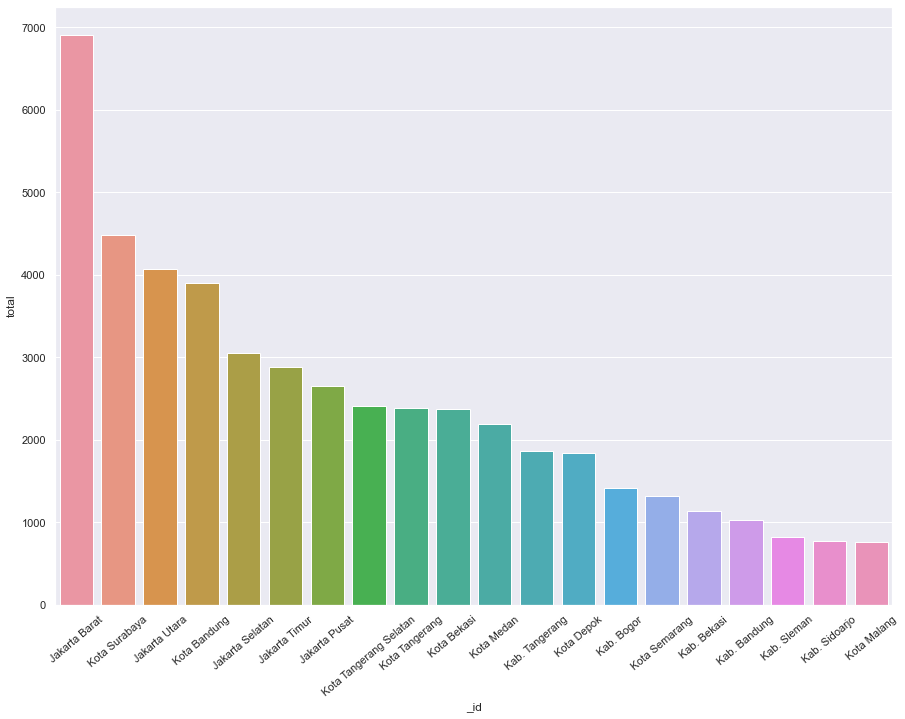

In [24]:
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

grafik(df, (15,11), 'shop_location')

# toko

In [25]:
db.toko.find_one()

{'_id': 338447,
 'shopid': 338447,
 'username': 'sahabatgolf75',
 'url': 'https://tokopedia.com/sahabatgolf75',
 'city_name': 'Kota Administrasi Jakarta Timur',
 'district_name': 'Makasar',
 'jum_product': 104,
 'sold': 5353,
 'tx': 2505,
 'percent_tx': 97.813,
 'location': 'Jakarta Timur',
 'rating': 4.8,
 'review': 1326,
 'score_map': 11,
 'score': 5622,
 'kep_bad': 0,
 'kep_good': 14,
 'kep_neutral': 0,
 'kecepatan': 4,
 'last_updated': datetime.datetime(2021, 8, 10, 8, 57, 43, 962000)}

In [26]:
aggr = [
    {
        "$group": {
            "_id": "$kecepatan",
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { "total": -1 } },
    { "$limit": 20 }
]

hasil = db.toko.aggregate(aggr)
hasil = list(hasil)

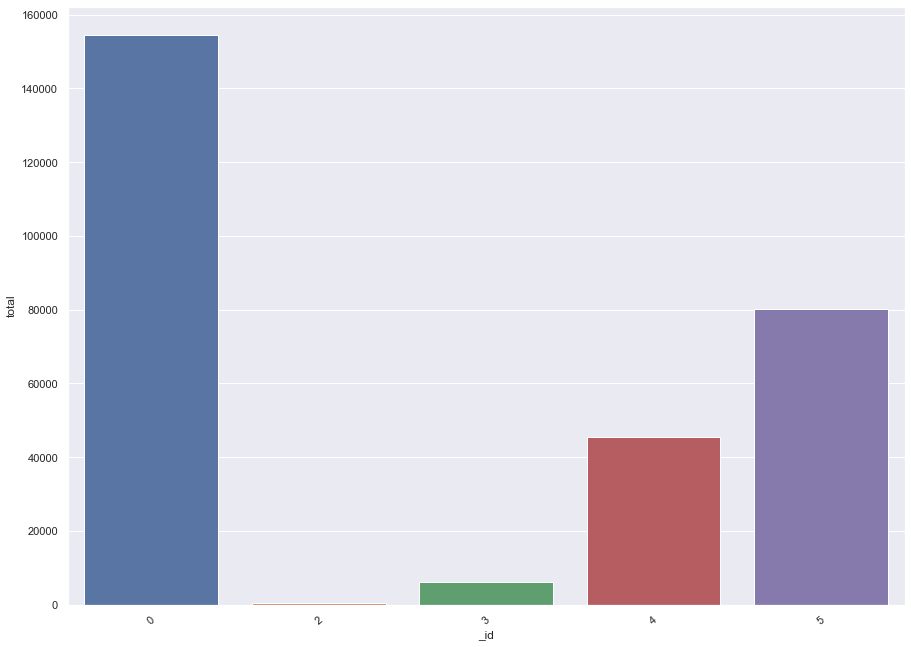

In [27]:
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

fig_dims = (15, 11)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(data = df, x='_id', y='total', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.show(g)

# query data

In [28]:
db.product.count()

f:\python3\environment\test\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


3111377

# stat produk 

In [38]:
db.product.find_one()

{'_id': 256049200,
 'shop': {'_id': 85406,
  'username': 'recshop',
  'percent_tx': 98.747,
  'location': 'Jakarta Utara',
  'rating': 4.7,
  'score_map': 15,
  'kecepatan': 5},
 'itemid': 256049200,
 'name': 'BOLA GOLF BEKAS ASLI ISI 50 PCS MURAH GROSIR ORIGINAL',
 'price': 100000,
 'shopid': 85406,
 'url': 'https://www.tokopedia.com/recshop/bola-golf-bekas-asli-isi-50-pcs-murah-grosir-original',
 'description': '',
 'weight': 2500,
 'last_updated': datetime.datetime(2021, 8, 10, 22, 38, 0, 775000),
 'images': ['https://ecs7.tokopedia.net/img/cache/300/product-1/2019/11/8/256049200/256049200_478d93f7-1cdf-4361-b797-3a20395db966_1170_1170.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2018/4/8/233794/233794_3c0c07f9-1970-423d-9579-2b84a90dee69_820_461.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2018/4/8/233794/233794_e4db9b30-b8ab-406e-8822-1c74784cb20c_461_820.jpg'],
 'cat_id_1': '62',
 'cat_id_2': '3415',
 'cat_id_3': '3613',
 'stock': 999532,
 'view': 11

# insight Produk

In [30]:
import requests
from PIL import Image
import io

In [31]:
def get_image(url):
    res = requests.get(url, stream=True)
    image = Image.open(io.BytesIO(res.content))
    return image

In [32]:
def plotting_prod(products):
    for prod in products:
        
        image = get_image(prod['images'][0])
        
        display(image)
        print('Harga : {}'.format(prod['price']))
        print('Name : {}'.format(prod['name']))
    

In [33]:
products = db.product.find({ '$text': { '$search': "gamis kafir" } } ).sort("sold_day_3", pymongo.DESCENDING).limit(10)
products = list(products)

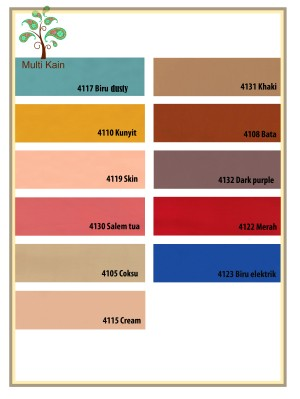

Harga : 10750
Name : bahan kain wolpis wolfis woolpis woolfis wolvis premium gamis fashion - warna lain


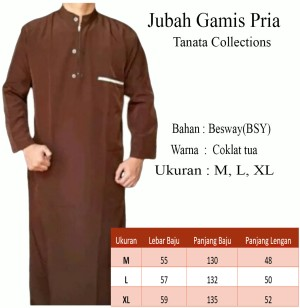

Harga : 69000
Name : JUBAH GAMIS PRIA DEWASA AL-HARBI BAHAN ADEM - Cokelat, M


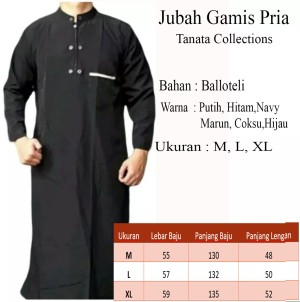

Harga : 85000
Name : JUBAH GAMIS PRIA DEWASA AL-HARBI BAHAN ADEM - Hitam, XL


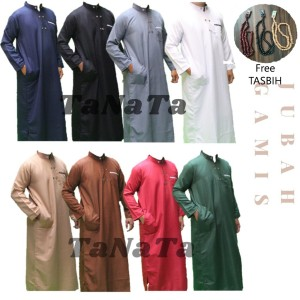

Harga : 67000
Name : JUBAH GAMIS PRIA DEWASA AL-HARBI BAHAN ADEM - Navy, M


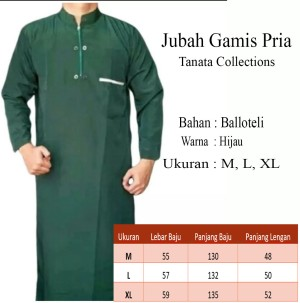

Harga : 65000
Name : JUBAH GAMIS PRIA DEWASA AL-HARBI BAHAN ADEM - Hijau, XL


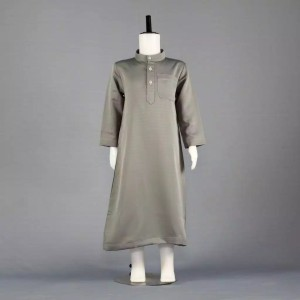

Harga : 85000
Name : Jubah Anak Usia 2-12 tahun / Gamis Anak / Baju Muslim Anak laki laki - Abu-abu, 2


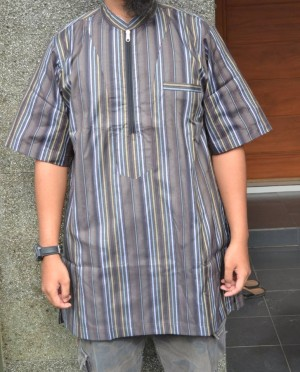

Harga : 125000
Name : Gamis Pakistan 01 | Corak Striping


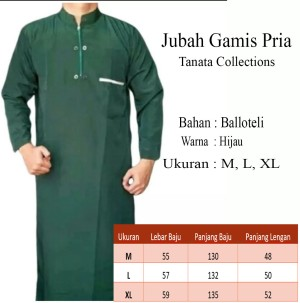

Harga : 65000
Name : JUBAH GAMIS PRIA DEWASA AL-HARBI BAHAN ADEM - Hijau, L


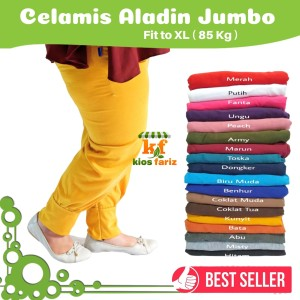

Harga : 16900
Name : Aladin Jumbo / Celamis Aladin / Dalaman gamis / Celana Santai /Legging


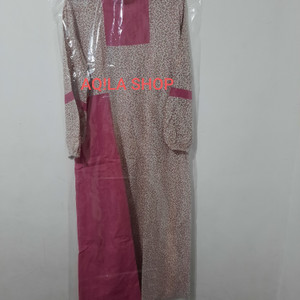

Harga : 5000
Name : plastik long dress/plastik baju gantung ukuran baju gamis cover baju - 75 gram, 55X150


In [34]:
plotting_prod(products)

# cek jumlah error produk

In [35]:
errors = db.product.find({ '$expr': { '$gt': [ "$tx_month" , "$sold_month" ] } }).count()

f:\python3\environment\test\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


In [36]:
print(errors)

163
